In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV


import os
import time
import sys

from sklearn.externals import joblib

In [2]:
df = pd.read_csv("million1.csv")

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Name,Age,Overall,Potential,Club,Value,Wage,Acceleration,...,Strength,Sprint speed,Stamina,Preferred Positions,Thou/Mill,Value Int,Wage Int,Preferred Position,age group,class group
0,0,0,Cristiano Ronaldo,32,94,94,Real Madrid CF,€95.5M,€565K,89.0,...,80.0,91.0,92.0,ST LW,Mill,95000000.0,565000.0,ST,30-36,World Class
1,1,1,L. Messi,30,93,93,FC Barcelona,€105M,€565K,92.0,...,59.0,87.0,73.0,RW,Mill,105000000.0,565000.0,RW,24-30,World Class
2,3,3,L. Suárez,30,92,92,FC Barcelona,€97M,€510K,88.0,...,80.0,77.0,89.0,ST,Mill,97000000.0,510000.0,ST,24-30,World Class
3,2,2,Neymar,25,92,94,Paris Saint-Germain,€123M,€280K,94.0,...,53.0,90.0,78.0,LW,Mill,123000000.0,280000.0,LW,24-30,World Class
4,5,5,R. Lewandowski,28,91,91,FC Bayern Munich,€92M,€355K,79.0,...,84.0,83.0,79.0,ST,Mill,92000000.0,355000.0,ST,24-30,World Class
5,7,7,E. Hazard,26,90,91,Chelsea,€90.5M,€295K,93.0,...,65.0,87.0,79.0,LW,Mill,90000000.0,295000.0,LW,24-30,World Class
6,9,9,G. Higuaín,29,90,90,Juventus,€77M,€275K,78.0,...,85.0,80.0,72.0,ST,Mill,77000000.0,275000.0,ST,24-30,World Class
7,8,8,T. Kroos,27,90,90,Real Madrid CF,€79M,€340K,60.0,...,74.0,52.0,77.0,CDM CM,Mill,79000000.0,340000.0,CD,24-30,World Class
8,10,10,Sergio Ramos,31,90,90,Real Madrid CF,€52M,€310K,75.0,...,81.0,77.0,84.0,CB,Mill,52000000.0,310000.0,CB,30-36,World Class
9,17,17,G. Chiellini,32,89,89,Juventus,€38M,€225K,68.0,...,91.0,78.0,68.0,CB,Mill,38000000.0,225000.0,CB,30-36,World Class


In [4]:
del df["Unnamed: 0"]

In [5]:
del df["Unnamed: 0.1"]

In [6]:
# del df

In [7]:
del df["Name"]
del df["Thou/Mill"]
del df["Preferred Positions"]
del df["age group"]
del df["class group"]
del df["Club"]
del df["Value"]
del df["Wage"]

In [8]:
del df["Overall"]

In [9]:
df.count()

Age                   6352
Potential             6352
Acceleration          6352
Aggression            6352
Ball control          6352
Dribbling             6352
Finishing             6352
Shot power            6352
Strength              6352
Sprint speed          6352
Stamina               6352
Value Int             6352
Wage Int              6352
Preferred Position    6352
dtype: int64

In [10]:
df.describe()

,Age,Potential,Acceleration,Aggression,Ball control,Dribbling,Finishing,Shot power,Strength,Sprint speed,Stamina,Value Int,Wage Int
count,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6352.000000,6.352000e+03,6352.000000
mean,25.976228,76.113508,70.573992,64.719301,70.015743,66.960485,56.015586,67.106895,68.861304,71.044238,71.908533,5.264169e+06,25105.006297
std,3.830683,4.582510,12.211264,14.061332,7.814859,11.550094,16.360379,11.483371,12.054466,11.599321,9.841092,7.712565e+06,33360.894670
min,17.000000,68.000000,26.000000,22.000000,29.000000,14.000000,10.000000,13.000000,25.000000,27.000000,30.000000,1.000000e+06,1000.000000
25%,23.000000,73.000000,65.000000,56.000000,66.000000,63.000000,44.000000,61.000000,62.000000,65.000000,66.000000,1.000000e+06,8000.000000
50%,26.000000,75.000000,72.000000,67.000000,71.000000,69.000000,60.000000,69.000000,70.000000,72.500000,72.000000,3.000000e+06,15000.000000
75%,29.000000,79.000000,79.000000,75.000000,75.000000,74.000000,69.000000,75.000000,77.000000,78.000000,78.000000,6.000000e+06,29000.000000
max,38.000000,94.000000,96.000000,96.000000,95.000000,97.000000,95.000000,94.000000,96.000000,96.000000,95.000000,1.230000e+08,565000.000000


In [11]:
sample_df=df.sample(n=1000)

In [12]:
sample_df.columns

Index(['Age', 'Potential', 'Acceleration', 'Aggression', 'Ball control',
       'Dribbling', 'Finishing', 'Shot power', 'Strength', 'Sprint speed',
       'Stamina', 'Value Int', 'Wage Int', 'Preferred Position'],
      dtype='object')

In [13]:
num_cols = ['Age', 'Potential', 'Acceleration', 'Aggression',
       'Ball control', 'Dribbling', 'Finishing', 'Shot power', 'Strength',
       'Sprint speed', 'Stamina', 'Value Int', 'Wage Int']
cat_cols = [
    "Preferred Position"
]

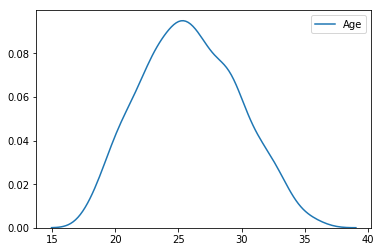

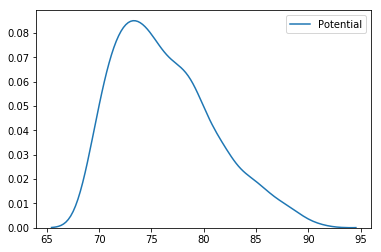

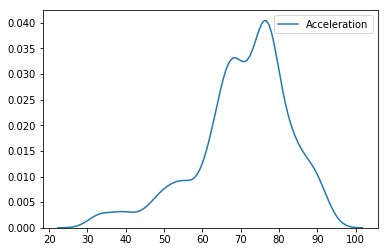

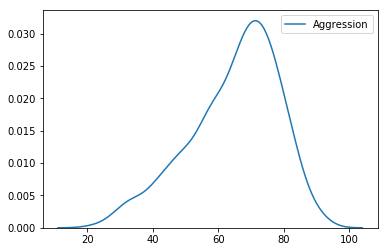

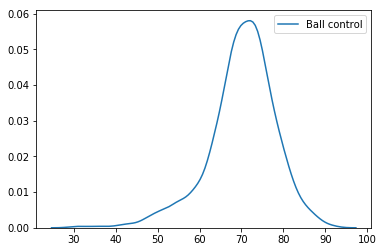

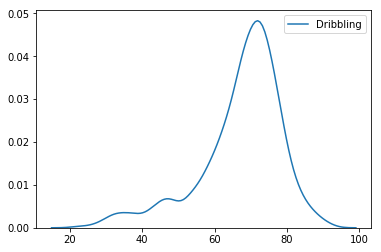

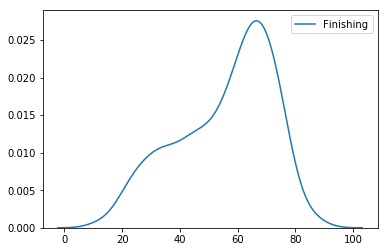

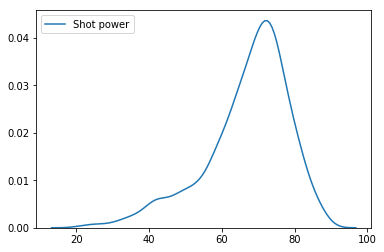

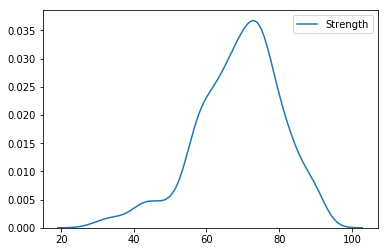

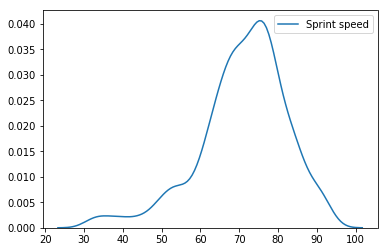

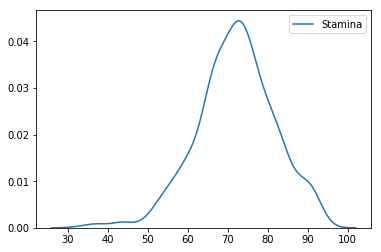

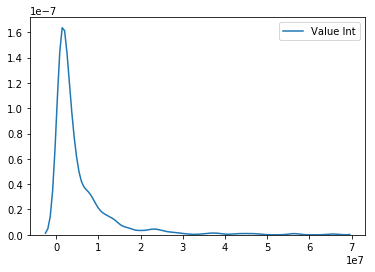

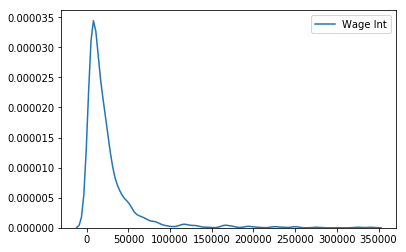

In [14]:
for col in num_cols:
    sns.kdeplot(sample_df[col])
    plt.show()

In [15]:
sample_df.dtypes

Age                     int64
Potential               int64
Acceleration          float64
Aggression            float64
Ball control          float64
Dribbling             float64
Finishing             float64
Shot power            float64
Strength              float64
Sprint speed          float64
Stamina               float64
Value Int             float64
Wage Int              float64
Preferred Position     object
dtype: object

In [16]:
sample_df["Preferred Position"].unique()

array(['CB', 'CM', 'ST', 'LB', 'CD', 'RM', 'CA', 'LM', 'CF', 'LW', 'RB',
       'RW'], dtype=object)

In [17]:
# omit Value Int from this model since it is directly related to Wage
features_to_use= ['Age', 'Potential', 'Acceleration', 'Aggression',
       'Ball control', 'Dribbling', 'Finishing', 'Shot power', 'Strength',
       'Sprint speed', 'Stamina',
       'Preferred Position']

In [18]:
X = sample_df[features_to_use]

In [19]:
y = sample_df[["Wage Int"]]

In [20]:
X.head()

,Age,Potential,Acceleration,Aggression,Ball control,Dribbling,Finishing,Shot power,Strength,Sprint speed,Stamina,Preferred Position
3765,28,73,65.0,71.0,64.0,55.0,37.0,69.0,84.0,74.0,84.0,CB
1082,19,86,79.0,90.0,77.0,78.0,65.0,85.0,77.0,78.0,86.0,CM
5718,24,74,74.0,50.0,70.0,73.0,66.0,65.0,65.0,78.0,63.0,ST
5803,22,77,76.0,55.0,63.0,72.0,62.0,74.0,40.0,80.0,66.0,ST
1390,27,77,57.0,80.0,77.0,71.0,78.0,80.0,86.0,59.0,79.0,ST


In [21]:
y.head()

,Wage Int
3765,10000.0
1082,49000.0
5718,5000.0
5803,7000.0
1390,63000.0


In [22]:
X_encoded = pd.get_dummies(X)

In [23]:
X_encoded.count()

Age                      1000
Potential                1000
Acceleration             1000
Aggression               1000
Ball control             1000
Dribbling                1000
Finishing                1000
Shot power               1000
Strength                 1000
Sprint speed             1000
Stamina                  1000
Preferred Position_CA    1000
Preferred Position_CB    1000
Preferred Position_CD    1000
Preferred Position_CF    1000
Preferred Position_CM    1000
Preferred Position_LB    1000
Preferred Position_LM    1000
Preferred Position_LW    1000
Preferred Position_RB    1000
Preferred Position_RM    1000
Preferred Position_RW    1000
Preferred Position_ST    1000
dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [25]:
X_train.shape, X_test.shape

((750, 23), (250, 23))

In [26]:
X_train.head()

,Age,Potential,Acceleration,Aggression,Ball control,Dribbling,Finishing,Shot power,Strength,Sprint speed,...,Preferred Position_CD,Preferred Position_CF,Preferred Position_CM,Preferred Position_LB,Preferred Position_LM,Preferred Position_LW,Preferred Position_RB,Preferred Position_RM,Preferred Position_RW,Preferred Position_ST
3461,26,73,54.0,74.0,65.0,57.0,39.0,59.0,83.0,55.0,...,0,0,1,0,0,0,0,0,0,0
4571,24,76,78.0,69.0,73.0,78.0,62.0,79.0,40.0,79.0,...,0,0,1,0,0,0,0,0,0,0
4993,28,69,66.0,45.0,69.0,65.0,65.0,67.0,57.0,69.0,...,0,0,0,0,0,0,0,1,0,0
1790,32,75,40.0,69.0,62.0,48.0,32.0,72.0,77.0,54.0,...,0,0,0,0,0,0,0,0,0,0
5315,20,75,59.0,59.0,68.0,61.0,72.0,65.0,42.0,59.0,...,0,0,1,0,0,0,0,0,0,0


In [27]:
# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

In [28]:
joblib.dump(sds, "scaler.model")

['scaler.model']

In [29]:
# y_train

In [30]:
for i in range(5):
    
    t0 = time.time()
    model = DecisionTreeRegressor()
    
    model.fit(X_train, y_train)
    t1 = time.time()
    
#     ypred = model.predict(X_train)
    scores = model.score(X_test, y_test.values.ravel())
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X_encoded.columns 
    for cfi in zip(c, model.feature_importances_):
        print(cfi)
    print()

Decision tree 1 took 0.10611915588378906 seconds to train and got a score of 0.28456031030247875

And here are the top features: 
('Age', 0.12518465500663759)
('Potential', 0.20726782624158738)
('Acceleration', 0.055715718851884435)
('Aggression', 0.02015273157263686)
('Ball control', 0.338769955125401)
('Dribbling', 0.02245786087695687)
('Finishing', 0.03595539923827276)
('Shot power', 0.02699892283229124)
('Strength', 0.07119798877205961)
('Sprint speed', 0.020138863830409033)
('Stamina', 0.036724544530570676)
('Preferred Position_CA', 0.002513955926239889)
('Preferred Position_CB', 0.0003317914659168867)
('Preferred Position_CD', 0.005784513055616516)
('Preferred Position_CF', 0.0003305541344092145)
('Preferred Position_CM', 0.0007995913957780003)
('Preferred Position_LB', 0.0029399370532197646)
('Preferred Position_LM', 0.0005278107972629782)
('Preferred Position_LW', 0.00041212096615227643)
('Preferred Position_RB', 0.0003303587749532812)
('Preferred Position_RM', 0.02439892760117

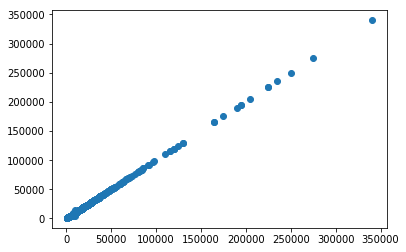

In [31]:
plt.scatter(model.predict(X_train), y_train.values)

## get ride of overall

In [32]:
#dribble.com